In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [3]:
Retail = pd.read_csv("https://raw.githubusercontent.com/Hiddensensu/RetailData2024/main/Retail_Transaction_Dataset.csv")
Retail

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484
...,...,...,...,...,...,...,...,...,...,...
99995,726461,A,2,56.078258,7/17/2023 16:59,Credit Card,"3632 Darren Station Apt. 553\nEricaborough, RI...",Clothing,18.345145,91.581240
99996,328056,A,6,88.516406,5/30/2023 9:04,Credit Card,"821 Taylor Shoals\nEvansville, IL 70845",Electronics,3.995541,509.878179
99997,887304,B,4,72.385564,8/25/2023 7:59,Credit Card,"50653 Kara Lakes\nStephanieborough, RI 94492",Clothing,17.423979,239.092472
99998,326401,C,5,66.542239,2/5/2024 19:45,PayPal,"18756 Mcfarland Way Suite 866\nBarnettside, PR...",Electronics,14.345018,284.983717


In [4]:
payment_counts = Retail['PaymentMethod'].value_counts()
payment_counts

PaymentMethod
PayPal         25067
Credit Card    25034
Cash           25008
Debit Card     24891
Name: count, dtype: int64

In [6]:
Retail.shape

(100000, 10)

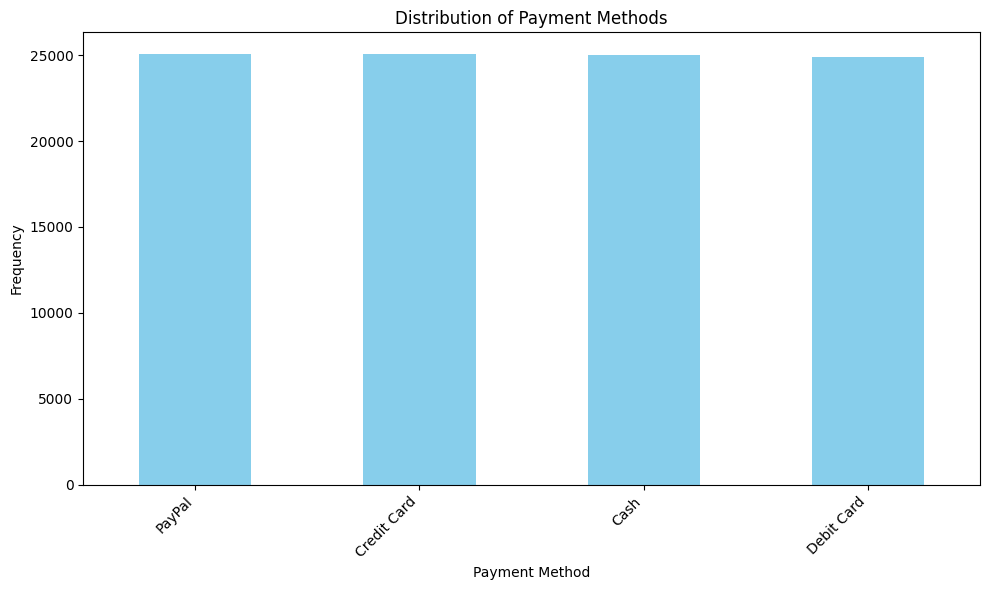

In [7]:
plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\17185\AppData\Local\Temp\ipykernel_2484\1781595376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PaymentMethod', y='Price', data=Retail, palette='Set2')


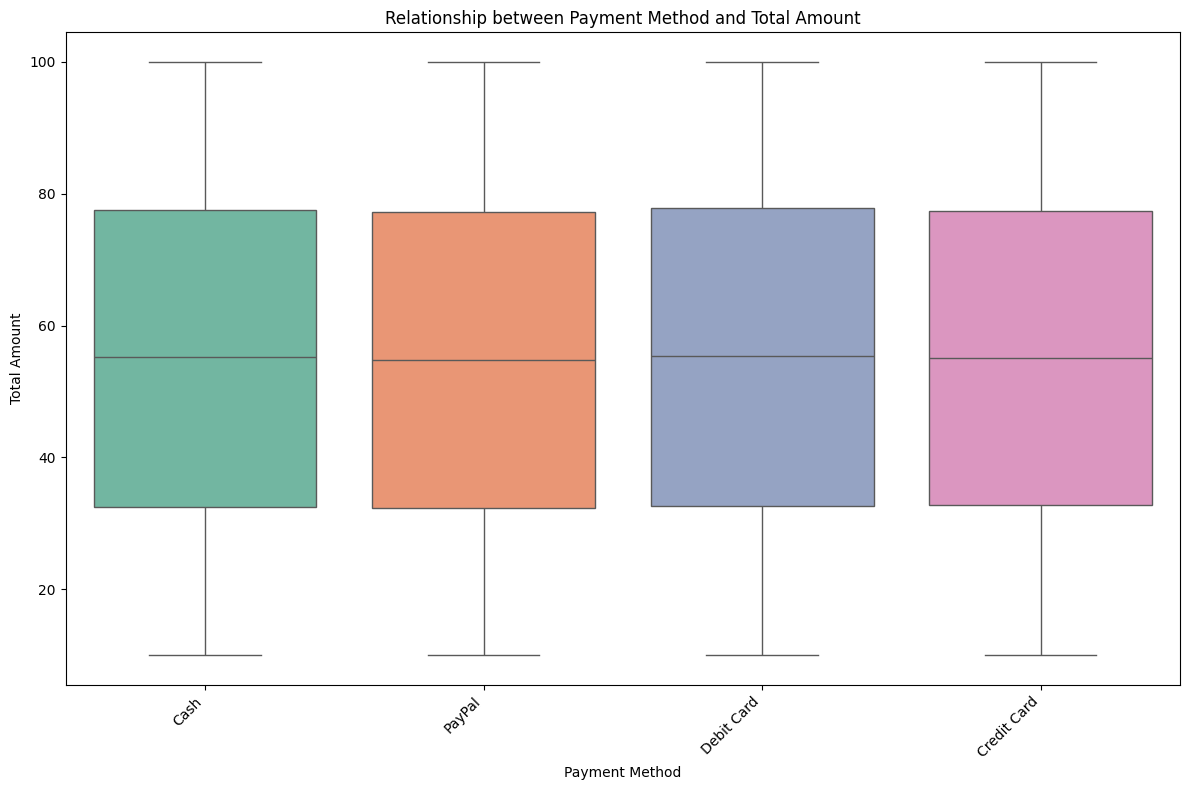

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='PaymentMethod', y='Price', data=Retail, palette='Set2')
plt.title('Relationship between Payment Method and Total Amount')
plt.xlabel('Payment Method')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

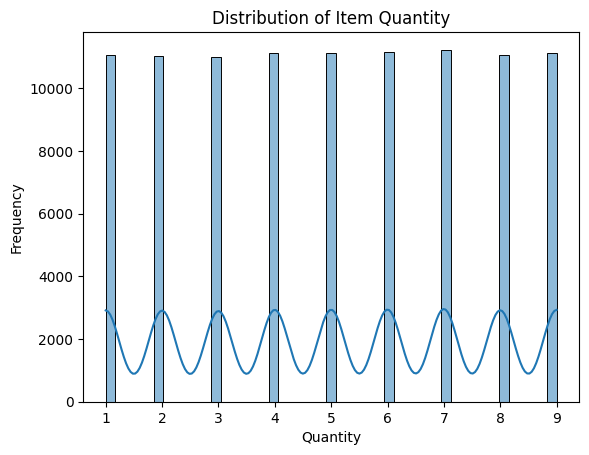

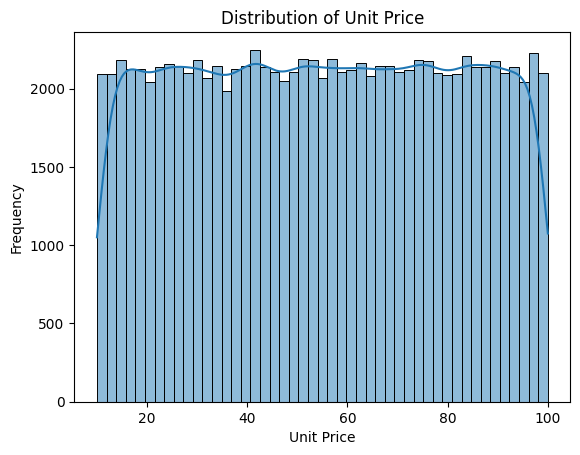

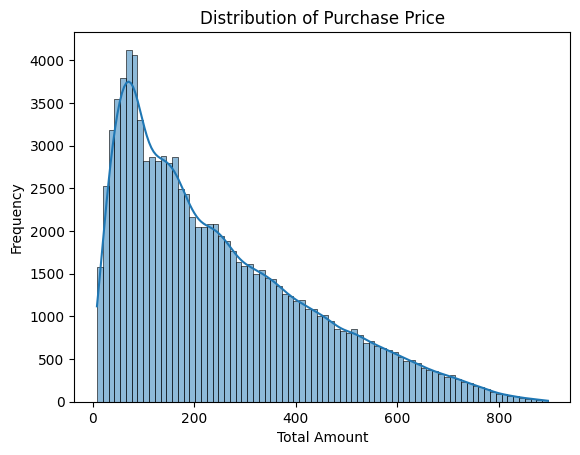

In [9]:
sns.histplot(data=Retail, x='Quantity', kde=True)
plt.title('Distribution of Item Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=Retail, x='Price', kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=Retail, x='TotalAmount', kde=True)
plt.title('Distribution of Purchase Price')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

In [10]:
average_quantity_per_payment = Retail.groupby('PaymentMethod')['Quantity'].mean().sort_values(ascending=False)


C:\Users\17185\AppData\Local\Temp\ipykernel_2484\2798948772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_quantity_per_payment.index, y=average_quantity_per_payment.values, palette='Set2')


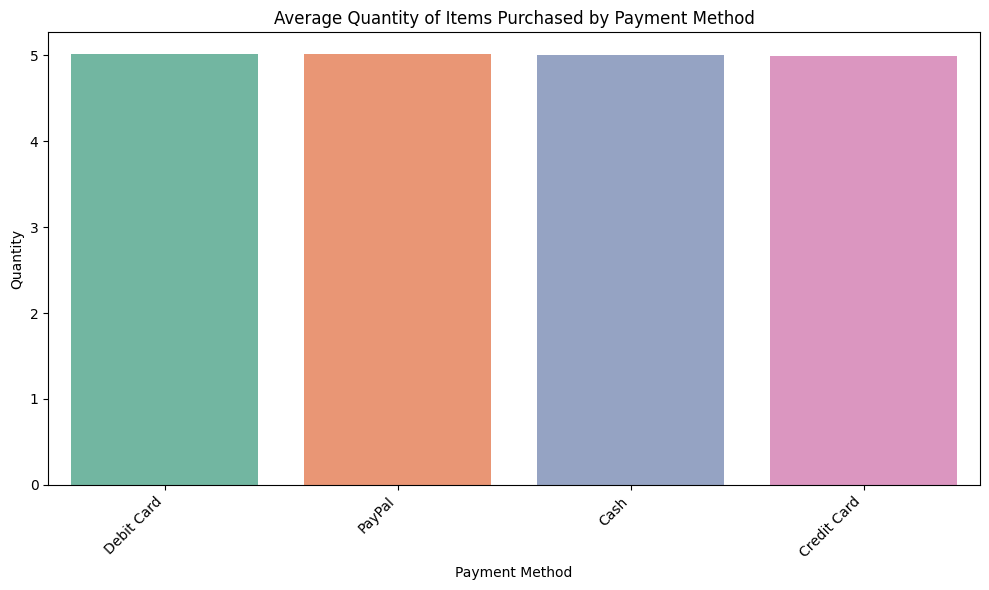

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_quantity_per_payment.index, y=average_quantity_per_payment.values, palette='Set2')
plt.title('Average Quantity of Items Purchased by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [12]:
Retail.dtypes

CustomerID              int64
ProductID              object
Quantity                int64
Price                 float64
TransactionDate        object
PaymentMethod          object
StoreLocation          object
ProductCategory        object
DiscountApplied(%)    float64
TotalAmount           float64
dtype: object

In [13]:
Retail['Price'] = Retail['Price'].astype(float)

In [15]:
Retail = pd.DataFrame(Retail)

X = Retail[['Quantity', 'Price', 'ProductCategory']]  
y = Retail['TotalAmount'] 

X = pd.get_dummies(X, columns=['ProductCategory'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model_1 = LinearRegression()

In [18]:
model_1.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
y_pred = model_1.predict(X_test_scaled)
y_pred

array([374.67112145, 137.80296486, 137.64450296, ..., 106.18948005,
       109.88210394, 192.87022283])

In [20]:
mean_squared_error(y_test, y_pred)

4039.4368144024866

In [21]:
r2 = r2_score(y_test, y_pred)
r2

0.881714633246321

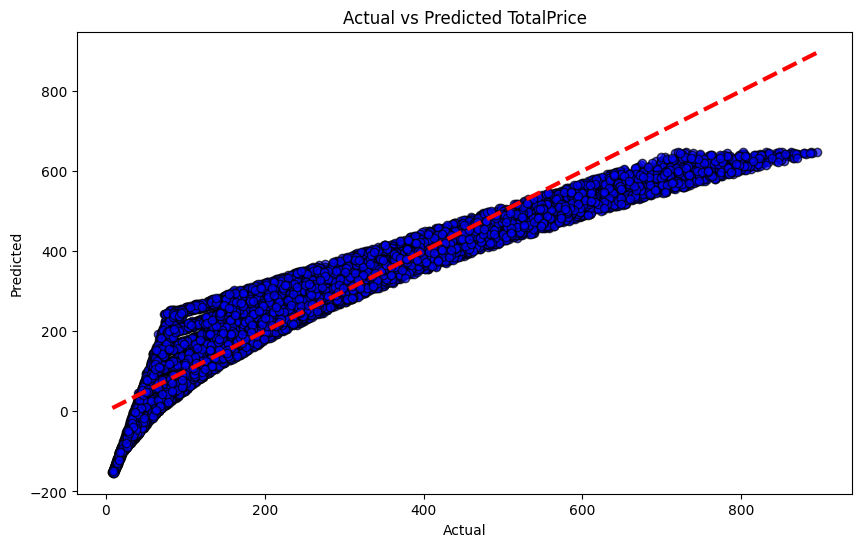

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted TotalPrice')
plt.show()

In [23]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_poly_pred = poly_reg.predict(X_poly_test)

In [24]:
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_mse

387.99131954785537

In [25]:
poly_r2 = r2_score(y_test, y_poly_pred)
poly_r2

0.9886385905663063

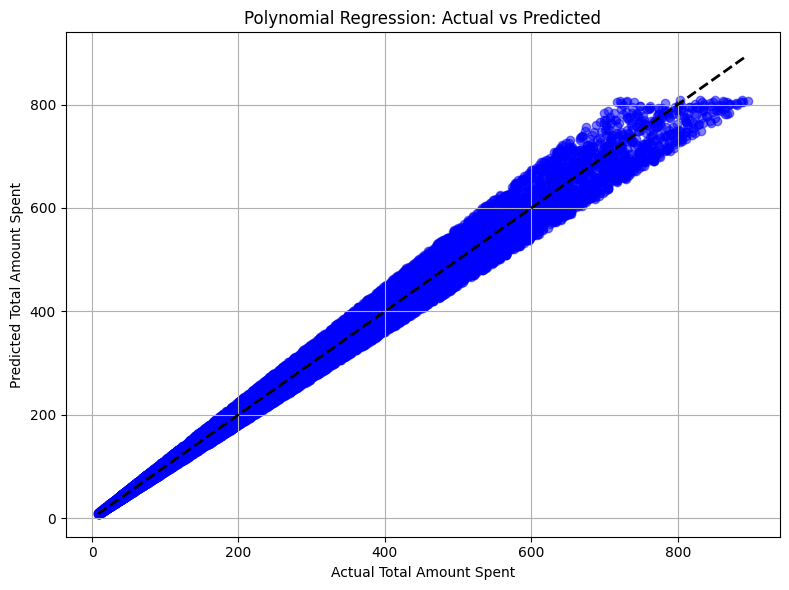

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_poly_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Total Amount Spent')
plt.ylabel('Predicted Total Amount Spent')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()